In [10]:
!pip install u8darts[all]==0.25.0

     |████████████████████████████████| 760 kB 1.5 MB/s eta 0:00:01    |▉                               | 20 kB 1.2 MB/s eta 0:00:01
  Attempting uninstall: u8darts
    Found existing installation: u8darts 0.27.0
    Uninstalling u8darts-0.27.0:
      Successfully uninstalled u8darts-0.27.0


In [1]:
from darts.datasets import WeatherDataset, ILINetDataset
from darts.models import LightGBMModel
from darts.utils.missing_values import missing_values_ratio, fill_missing_values
from darts import TimeSeries

In [9]:
# ILINetDataset

In [ ]:
series = ILINetDataset().load()

In [10]:
import pandas as pd

In [11]:
#df = pd.read_csv('ILINet.csv')

In [12]:
#df_filled = pd.read_csv('Weather_filled.csv')

In [ ]:
df = series.pd_dataframe()

In [13]:
df

,DATE,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,1997-10-12,1.10148,1.21686,179.0,NaN,157.0,205.0,NaN,29.0,570.0,192.0,46842.0
1,1997-10-19,1.20007,1.28064,199.0,NaN,151.0,242.0,NaN,23.0,615.0,191.0,48023.0
2,1997-10-26,1.37876,1.23906,228.0,NaN,153.0,266.0,NaN,34.0,681.0,219.0,54961.0
3,1997-11-02,1.19920,1.14473,188.0,NaN,193.0,236.0,NaN,36.0,653.0,213.0,57044.0
4,1997-11-09,1.65618,1.26112,217.0,NaN,162.0,280.0,NaN,41.0,700.0,213.0,55506.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2022-09-11,2.02422,1.94821,12548.0,6978.0,NaN,13475.0,2701.0,2632.0,38334.0,3324.0,1967653.0
1301,2022-09-18,2.03228,1.97359,13386.0,6709.0,NaN,14467.0,2599.0,2435.0,39596.0,3316.0,2006289.0
1302,2022-09-25,2.28328,2.20031,15904.0,6877.0,NaN,16571.0,2633.0,2473.0,44458.0,3329.0,2020531.0
1303,2022-10-02,2.36912,2.30242,16977.0,6869.0,NaN,16622.0,2764.0,2633.0,45865.0,3335.0,1992031.0


Components Descriptions:

% WEIGHTED ILI: Combined state-specific data of patients visit to healthcare providers for ILI reported each week weighted by state population

% UNWEIGHTED ILI: Combined state-specific data of patients visit to healthcare providers for ILI reported each week unweighted by state population

AGE 0-4: Number of patients between 0 and 4 years of age

AGE 25-49: Number of patients between 25 and 49 years of age

AGE 25-64: Number of patients between 25 and 64 years of age

AGE 5-24: Number of patients between 5 and 24 years of age

AGE 50-64: Number of patients between 50 and 64 years of age

AGE 65: Number of patients above (>=65) 65 years of age

ILITOTAL: Total number of ILI patients. For this system, ILI is defined as fever (temperature of 100°F [37.8°C] or greater) and a cough and/or a sore throat

NUM. OF PROVIDERS: Number of outpatient healthcare providers

TOTAL PATIENTS: Total number of patients

In [16]:
df.columns

Index(['DATE', '% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49',
       'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'TOTAL PATIENTS'],
      dtype='object')

In [14]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [18]:
df

,DATE,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,1997-10-12,1.10148,1.21686,179.0,NaN,157.0,205.0,NaN,29.0,570.0,192.0,46842.0
1,1997-10-19,1.20007,1.28064,199.0,NaN,151.0,242.0,NaN,23.0,615.0,191.0,48023.0
2,1997-10-26,1.37876,1.23906,228.0,NaN,153.0,266.0,NaN,34.0,681.0,219.0,54961.0
3,1997-11-02,1.19920,1.14473,188.0,NaN,193.0,236.0,NaN,36.0,653.0,213.0,57044.0
4,1997-11-09,1.65618,1.26112,217.0,NaN,162.0,280.0,NaN,41.0,700.0,213.0,55506.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2022-09-11,2.02422,1.94821,12548.0,6978.0,NaN,13475.0,2701.0,2632.0,38334.0,3324.0,1967653.0
1301,2022-09-18,2.03228,1.97359,13386.0,6709.0,NaN,14467.0,2599.0,2435.0,39596.0,3316.0,2006289.0
1302,2022-09-25,2.28328,2.20031,15904.0,6877.0,NaN,16571.0,2633.0,2473.0,44458.0,3329.0,2020531.0
1303,2022-10-02,2.36912,2.30242,16977.0,6869.0,NaN,16622.0,2764.0,2633.0,45865.0,3335.0,1992031.0


In [15]:
corr_matrix = df.corr()
corr_matrix['TOTAL PATIENTS'].sort_values()

% WEIGHTED ILI       0.271054
%UNWEIGHTED ILI      0.341655
AGE 25-49            0.628773
AGE 50-64            0.634444
AGE 5-24             0.651349
ILITOTAL             0.730209
AGE 65               0.734013
AGE 25-64            0.744417
AGE 0-4              0.801081
DATE                 0.888860
NUM. OF PROVIDERS    0.973413
TOTAL PATIENTS       1.000000
Name: TOTAL PATIENTS, dtype: float64

In [20]:
df.columns

Index(['DATE', '% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49',
       'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'TOTAL PATIENTS'],
      dtype='object')

In [21]:
col_list = ['% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49',
       'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'TOTAL PATIENTS']

In [23]:
#series = TimeSeries.from_dataframe(df, 'DATE', col_list)

In [59]:
series_filled = fill_missing_values(series)
df_filled = series_filled.pd_dataframe()

<Axes: xlabel='DATE'>

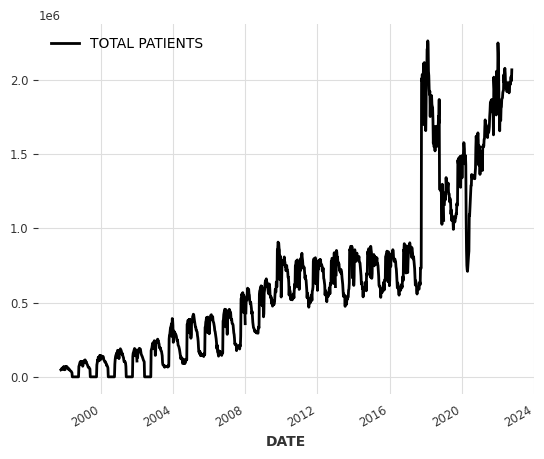

In [25]:
series['TOTAL PATIENTS'].plot()

<Axes: xlabel='DATE'>

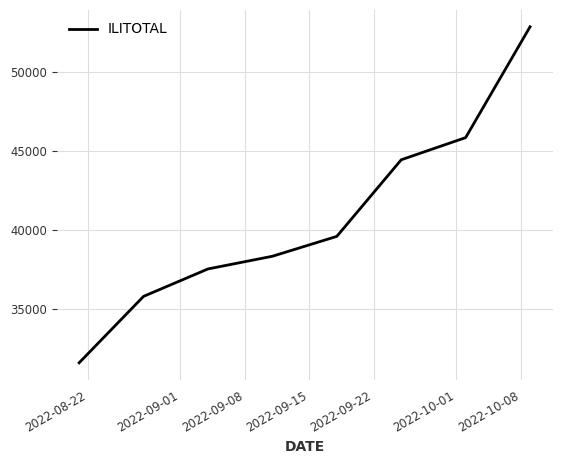

In [48]:
series['ILITOTAL'][-8:].plot()

In [66]:
num_test = 8 #weeks
output_chunk_len = 1

if output_chunk_len == num_test:
    num_forecast_rolls = 1
else:
    num_forecast_rolls = int(num_test/output_chunk_len)


In [60]:
target_series = series_filled['ILITOTAL']
past_covariates = series_filled[['NUM. OF PROVIDERS', 'TOTAL PATIENTS']]
#future_cov = series_filled_selected['T (degC)']

target_series_train, target_series_test = target_series[:-num_test], target_series[-num_test:]
#past_covariates_train, past_covariates_test = past_covariates[:-num_test], past_covariates[-num_test:]
#future_cov_train, future_cov_test = future_cov[:-num_test], future_cov[-num_test:]

# lags_past_covariates=output_chunk_len, lags_future_covariates=[0,1,2,3,4,5],



In [61]:
from darts import TimeSeries
import numpy as np


In [62]:
num_forecast_rolls

1

In [67]:
#all_preds = TimeSeries.from_values(np.array([])) # Did not work!
all_preds = [] # TODO: this has to be replaced with a TimeSeries as opposed to a raw list

for curr_roll in range(num_forecast_rolls):
    print('curr_roll=', curr_roll)

    curr_roll_model = LightGBMModel(
    lags=output_chunk_len,
    output_chunk_length=output_chunk_len,
    verbose=-1,
     n_jobs=-1
    )

    if curr_roll == 0:
        target_series_train_for_this_roll = target_series_train
    else:
        try:

            target_series_to_be_appended = target_series_test[
              (curr_roll-1)*output_chunk_len:(curr_roll-1)*output_chunk_len+output_chunk_len
              ]

            # TODO: Why do i keep getting error when using append instead of append values?
            # append would be much safer (making sure indicies are not messed up!) than current append_values.
            target_series_train_for_this_roll = target_series_train_for_this_roll.append_values(
              target_series_to_be_appended.values()
              )
        except:
            print('curr_roll=', curr_roll)
            print('target_series_to_be_appended', target_series_to_be_appended.time_index)
            print('target_series_train_for_this_roll', target_series_train_for_this_roll.time_index)
            assert(False)


    curr_roll_model.fit(target_series_train_for_this_roll)
    curr_roll_preds = curr_roll_model.predict(output_chunk_len)
    all_preds.append(list(curr_roll_preds.values().flatten()))

curr_roll= 0
curr_roll= 1
curr_roll= 2
curr_roll= 3
curr_roll= 4
curr_roll= 5
curr_roll= 6
curr_roll= 7


<Axes: xlabel='DATE'>

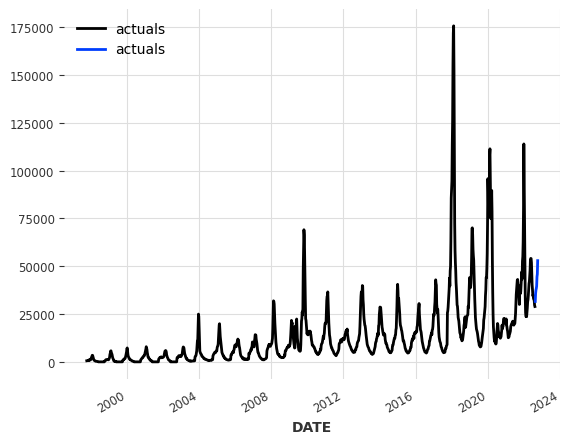

In [68]:
#pred.plot(label='preds')
target_series_train.plot(label='actuals')
target_series_test.plot(label='actuals')



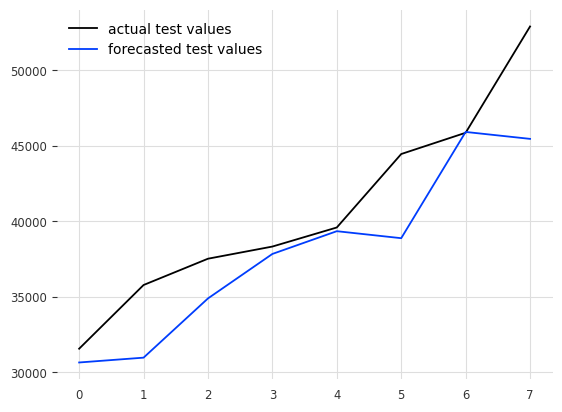

In [69]:
import matplotlib.pyplot as plt
plt.plot(target_series_test.values().flatten(), label='actual test values')
plt.plot(np.array(all_preds).flatten(), label='forecasted test values')
plt.legend()

### RNN

In [40]:
len(target_series_train)

4320

In [51]:
from darts.models import RNNModel

In [52]:
from pytorch_lightning.callbacks import Callback

class LossLogger(Callback):
    def __init__(self):
        self.train_loss = []
        self.val_loss = []

    # will automatically be called at the end of each epoch
    def on_train_epoch_end(self, trainer: "pl.Trainer", pl_module: "pl.LightningModule") -> None:
        self.train_loss.append(float(trainer.callback_metrics["train_loss"]))

    '''
    def on_validation_epoch_end(self, trainer: "pl.Trainer", pl_module: "pl.LightningModule") -> None:
        self.val_loss.append(float(trainer.callback_metrics["val_loss"]))
    '''


loss_logger = LossLogger()
'''
model = SomeTorchForecastingModel(
    ...,
    nr_epochs_val_period=1,  # perform validation after every epoch
    pl_trainer_kwargs={"callbacks": [loss_logger]}
)

# fit must include validation set for "val_loss"
model.fit(...)
'''


'\nmodel = SomeTorchForecastingModel(\n    ...,\n    nr_epochs_val_period=1,  # perform validation after every epoch\n    pl_trainer_kwargs={"callbacks": [loss_logger]}\n)\n\n# fit must include validation set for "val_loss"\nmodel.fit(...)\n'

In [70]:
try:
    del rnn_model
    del fitted_model
except:
    pass

In [71]:
rnn_model

NameError: name 'rnn_model' is not defined

In [72]:


import torch

rnn_model = RNNModel(
    model="LSTM",
    dropout=0,
    optimizer_kwargs={"lr": 1e-2},
    model_name="RNN",
    log_tensorboard=True,
    random_state=42,
    training_length=2*output_chunk_len, #TODO
    input_chunk_length=output_chunk_len,
    force_reset=True,
    save_checkpoints=False,
    pl_trainer_kwargs={"callbacks": [loss_logger]},
    lr_scheduler_cls=torch.optim.lr_scheduler.ExponentialLR,
    lr_scheduler_kwargs={"gamma": 0.09}
)


In [73]:
'''
TODO:
Setting training_length? Darts say: The length of both input (target and covariates)
and output (target) time series used during training. Generally speaking, `training_length`
should have a higher value than `input_chunk_length` because otherwise during training the RNN
is never run for as many iterations as it will during inference.
For more information on this parameter, please see `darts.utils.data.ShiftedDataset`
'''

'\nTODO:\nSetting training_length? Darts say: The length of both input (target and covariates)\nand output (target) time series used during training. Generally speaking, `training_length`\nshould have a higher value than `input_chunk_length` because otherwise during training the RNN\nis never run for as many iterations as it will during inference.\nFor more information on this parameter, please see `darts.utils.data.ShiftedDataset`\n'

<Axes: xlabel='DATE'>

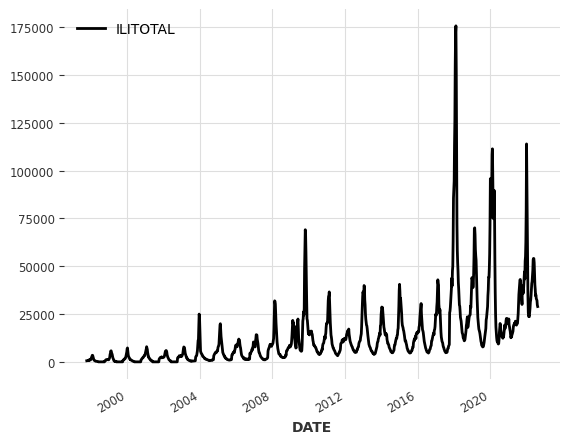

In [74]:
target_series_train.plot()

In [75]:
%%time
fitted_model = rnn_model.fit(target_series_train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | V             | Linear           | 26    
---------------------------------------------------
2.8 K     Trainable params
0         Non-trainable params
2.8 K     Total params
0.011     Total estimated model params size (MB)
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (41) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


CPU times: user 1min 35s, sys: 4.62 s, total: 1min 39s
Wall time: 1min 56s


In [76]:
fitted_model

RNNModel(model=LSTM, hidden_dim=25, n_rnn_layers=1, dropout=0, training_length=2, optimizer_kwargs={'lr': 0.01}, model_name=RNN, log_tensorboard=True, random_state=42, input_chunk_length=1, force_reset=True, save_checkpoints=False, pl_trainer_kwargs={'callbacks': [<__main__.LossLogger object at 0x7f08f91e0340>]}, lr_scheduler_cls=<class 'torch.optim.lr_scheduler.ExponentialLR'>, lr_scheduler_kwargs={'gamma': 0.09})

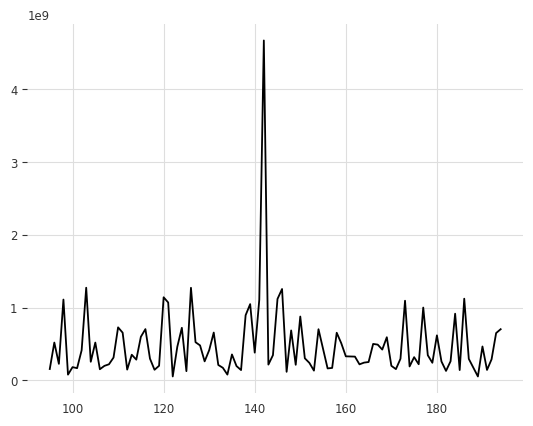

In [77]:
plt.plot(loss_logger.train_loss[:])

In [78]:
rnn_preds = rnn_model.predict(num_test)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='DATE'>

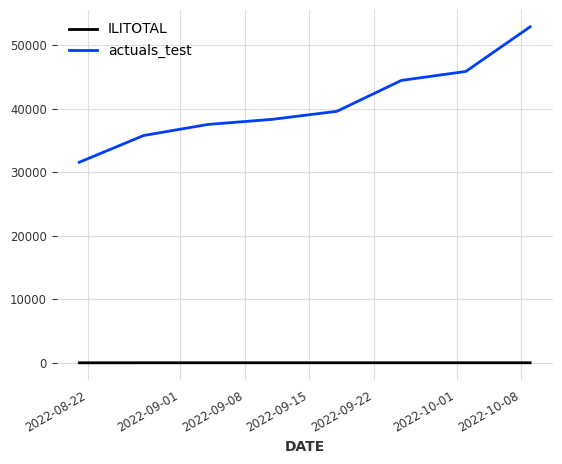

In [81]:
rnn_preds.plot()
target_series_test.plot(label='actuals_test')

<Axes: xlabel='DATE'>

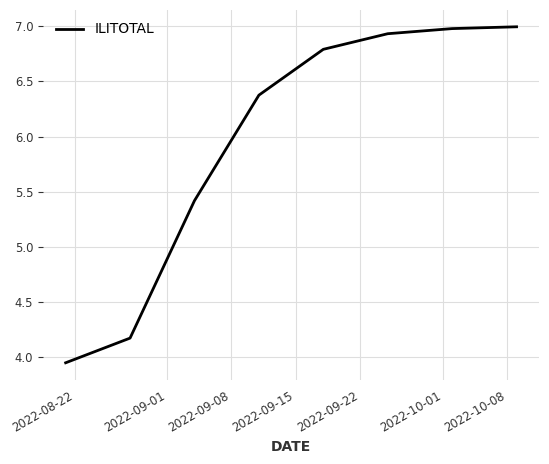

In [82]:
rnn_preds.plot()

<Axes: xlabel='DATE'>

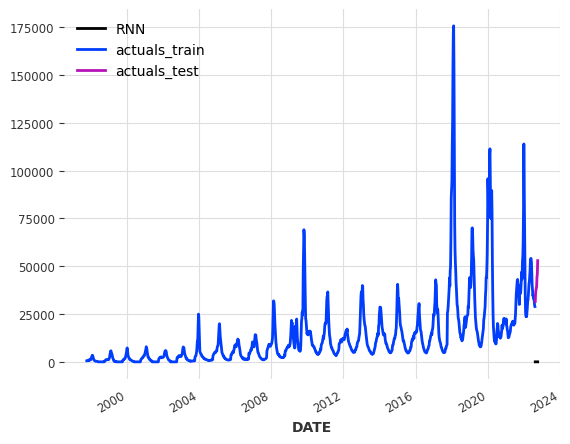

In [80]:
rnn_preds.plot(label='RNN')
target_series_train.plot(label='actuals_train')
target_series_test.plot(label='actuals_test')


In [84]:
rnn_model2 = RNNModel(
    model="LSTM",
    dropout=0,
    model_name="RNN",
    log_tensorboard=True,
    random_state=42,
    training_length=2*output_chunk_len, #TODO
    input_chunk_length=output_chunk_len,
    force_reset=True,
    save_checkpoints=False,
    pl_trainer_kwargs={"callbacks": [loss_logger]},
)


In [85]:
%%time
fitted_model = rnn_model2.fit(target_series_train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | V             | Linear           | 26    
---------------------------------------------------
2.8 K     Trainable params
0         Non-trainable params
2.8 K     Total params
0.011     Total estimated model params size (MB)
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (41) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


CPU times: user 1min 33s, sys: 4.81 s, total: 1min 38s
Wall time: 1min 57s


In [87]:
rnn_preds2 = rnn_model2.predict(num_test)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='DATE'>

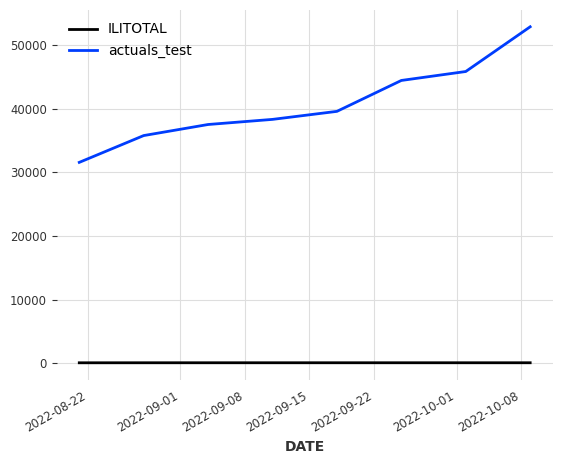

In [88]:
rnn_preds2.plot()
target_series_test.plot(label='actuals_test')

<Axes: xlabel='DATE'>

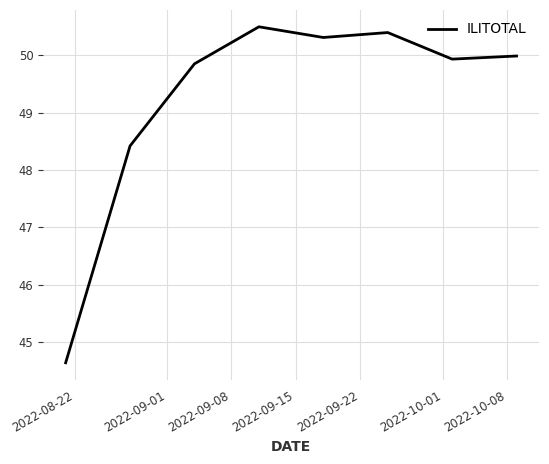

In [89]:
rnn_preds2.plot()

In [91]:
from darts.models import BlockRNNModel

In [93]:
model_name = "BlockRNN_test"
model_pastcov = BlockRNNModel(
    model="LSTM",
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=100,
    random_state=0,
    model_name=model_name,
    save_checkpoints=True,  # store model states: latest and best performing of validation set
    force_reset=True,
)

In [94]:
%%time
f = model_pastcov.fit(target_series_train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | fc            | Sequential       | 312   
---------------------------------------------------
3.1 K     Trainable params
0         Non-trainable params
3.1 K     Total params
0.012     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:369: `ModelCheckpoint(monitor='val_loss')` could not find the monitored key in the returned metrics: ['train_loss', 'epoch', 'step']. HINT: Did you call `log('val_loss', value)` in the `LightningModule`?
`Trainer.fit` stopped: `max_epochs=100` reached.


CPU times: user 3min 6s, sys: 10.4 s, total: 3min 16s
Wall time: 3min 17s


In [95]:
rnn_preds3 = model_pastcov.predict(num_test)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='DATE'>

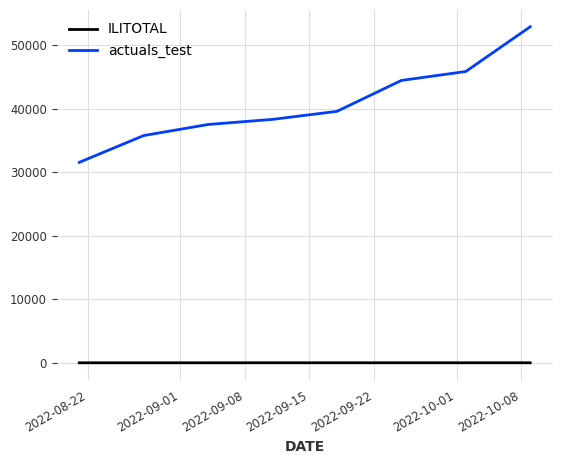

In [96]:
rnn_preds3.plot()
target_series_test.plot(label='actuals_test')